import sys
sys.path.append("e:\ml_practice")

for value in sys.path:
    print(value)

In [37]:
from deep_neural_network import deep_nn as nn
import optimization as op

import numpy as np
import matplotlib.pyplot as plt

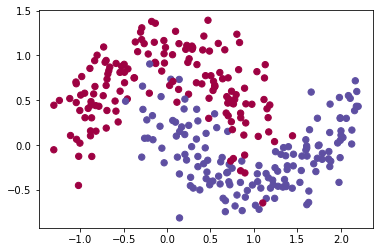

In [38]:
x, y = op.load_dataset()

In [39]:
def plot_decision_boundary(x, y, parameters):
    x_min, x_max = x[0, :].min() - 1, x[0, :].max() + 1
    y_min, y_max = x[1, :].min() - 1, x[1, :].max() + 1

    h = 0.01
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    # All the combination of x1 and x2 coordinate system
    all_points = np.c_[xx.ravel(), yy.ravel()]

    aL, caches = nn.L_model_forward(all_points.T, parameters)
    aL = (aL > 0.5).astype(int)
    aL = aL.reshape(xx.shape)

    plt.contourf(xx, yy, aL, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(x[0, :], x[1, :], c=y, cmap=plt.cm.Spectral)
    plt.show()


In [40]:
def model(x, y, layer_dims, optimizer, alpha = 0.0007,
          beta1 = 0.9, beta2 = 0.999, epsilon1 = 1e-8,
          num_epochs = 10000, print_cost = True,
          mini_batch_size = 64):

    L = len(layer_dims)
    costs = []
    m = x.shape[1]
    seed = 10
    epoch = 0

    print(f"The mini-batch size is {mini_batch_size}")
    parameters = nn.initialize_paraeters_deep(layer_dims)

    if optimizer == 'gd':
        pass
    elif optimizer == 'momentum':
        v = op.initialize_velocity(parameters)
    elif optimizer == 'adam':
        v, s = op.initialize_adam(parameters)


    for i in range(num_epochs):
        seed = seed + 1
        mini_batches = op.mini_batch_random(x, y , mini_batch_size, seed)
        cost_total = 0

        for minibatch in mini_batches:
            (mini_batch_x, mini_batch_y) = minibatch

            aL, caches = nn.L_model_forward(mini_batch_x, parameters)
            
            cost_total += nn.cross_entropy_loss(aL, mini_batch_y)

            grads = nn.L_model_backward(aL, mini_batch_y, caches)


            #Update Parameter
            if optimizer == 'gd':
                parameters = nn.update_parameters(parameters, grads, alpha)
            elif optimizer == 'momentum':
                parameters, v = op.update_parameters_with_velocity(parameters, grads, v, beta1, alpha)
            elif optimizer == 'adam':
                epoch += 1
                parameters, v, s = op.update_parameters_with_adam(
                    parameters, grads, v, s, 
                    epoch, alpha, beta1, beta2, epsilon1)
        
        cost_avg = cost_total / m

        if print_cost and i % 1000 == 0:
            print(f"Cost after epoch {i}: {cost_avg}")
        if print_cost and i % 100 == 0:
            costs.append(cost_avg)

    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(alpha))
    plt.show()

    return parameters

## Gradient Descent

The mini-batch size is 64
Cost after epoch 0: 0.7024046849828726
Cost after epoch 1000: 0.66810064295887
Cost after epoch 2000: 0.6352875703390978
Cost after epoch 3000: 0.600491198436302
Cost after epoch 4000: 0.5733672256957693
Cost after epoch 5000: 0.5519772083453836
Cost after epoch 6000: 0.5323695140170054
Cost after epoch 7000: 0.5140067717007158
Cost after epoch 8000: 0.49647205109014864
Cost after epoch 9000: 0.4680136839007519


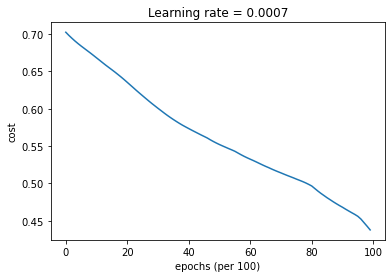

Training Accuracy =79.66666666666666 


In [41]:
layer_dims = [x.shape[0], 5,2,1]
parameters = model(x, y , layer_dims , optimizer='gd')

predictions = nn.predict(x, y , parameters, text = "Training")

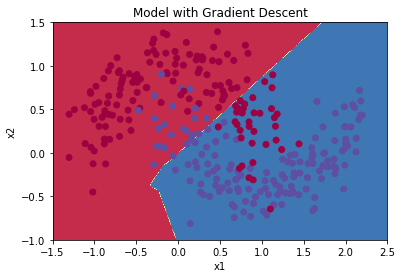

In [42]:
# Plot decision boundary
plt.title("Model with Gradient Descent")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(x, y , parameters)

## Momentum

The mini-batch size is 64
Cost after epoch 0: 0.7024127305373173
Cost after epoch 1000: 0.6681667772046955
Cost after epoch 2000: 0.6353882166761965
Cost after epoch 3000: 0.6005907762003798
Cost after epoch 4000: 0.5734441760375261
Cost after epoch 5000: 0.5520579978012191
Cost after epoch 6000: 0.532458404673331
Cost after epoch 7000: 0.5141006579460334
Cost after epoch 8000: 0.49665208993936555
Cost after epoch 9000: 0.46815966712698187


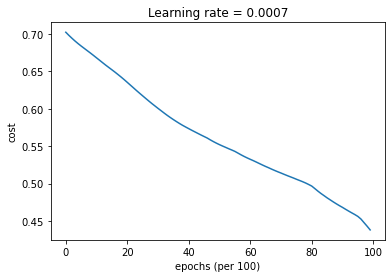

Training Accuracy =79.66666666666666 


In [43]:
layer_dims = [x.shape[0], 5, 2, 1]
parameters = model(x, y, layer_dims, optimizer='momentum')

predictions = nn.predict(x, y , parameters)

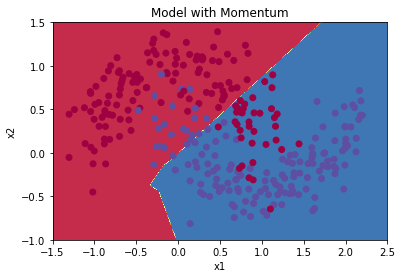

In [44]:
# Plot decision boundary
plt.title("Model with Momentum")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(x, y , parameters)

## Adam

The mini-batch size is 64
Cost after epoch 0: 0.7021655222604549
Cost after epoch 1000: 0.1678450528258116
Cost after epoch 2000: 0.14131619792956462
Cost after epoch 3000: 0.13878783500985872
Cost after epoch 4000: 0.13606616153974382
Cost after epoch 5000: 0.134240111214826
Cost after epoch 6000: 0.13112698193050087
Cost after epoch 7000: 0.13021564068726496
Cost after epoch 8000: 0.1296233798647996
Cost after epoch 9000: 0.1291183749863679


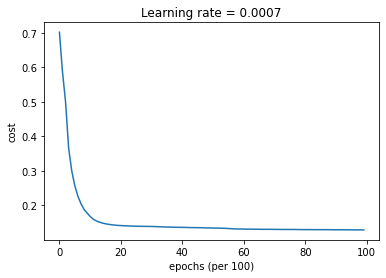

Training Accuracy =94.0 


In [45]:
layer_dims = [x.shape[0], 5, 2, 1]
parameters = model(x, y ,layer_dims, optimizer = 'adam')

prediction = nn.predict(x, y, parameters)

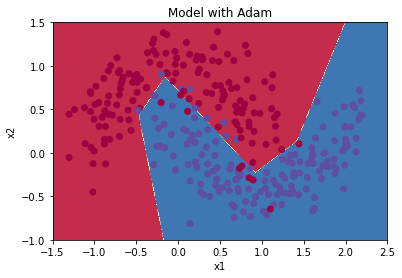

In [46]:
# Plot decision boundary
plt.title("Model with Adam")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(x, y , parameters)